In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
data_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d\temp.csv"
data_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d\10\temp.csv"

In [18]:
df_2d = pd.read_csv(data_dir_2d, header = None, skiprows = 1)
df_3d = pd.read_csv(data_dir_3d, header = None, skiprows = 1)

# Rename columns (assuming 3 columns: X, Y, Temperature)
df_2d.columns = ['X', 'Y', 'Temperature']
df_3d.columns = ['X', 'Y', 'Temperature']

In [19]:
df_2d.shape, df_3d.shape

((961, 3), (441, 3))

In [20]:
df_2d.head()

,X,Y,Temperature
0,0.000000e+00,0.000,342.135
1,-6.940000e-19,0.005,342.084
2,-1.390000e-18,0.010,342.026
3,-2.080000e-18,0.015,341.969
4,-2.780000e-18,0.020,341.915


In [21]:
df_3d.head()

,X,Y,Temperature
0,0.095,5.000000e-03,320.950
1,0.095,-5.490000e-34,320.723
2,0.100,-5.780000e-34,320.630
3,0.100,5.000000e-03,320.752
4,0.100,1.000000e-02,321.018


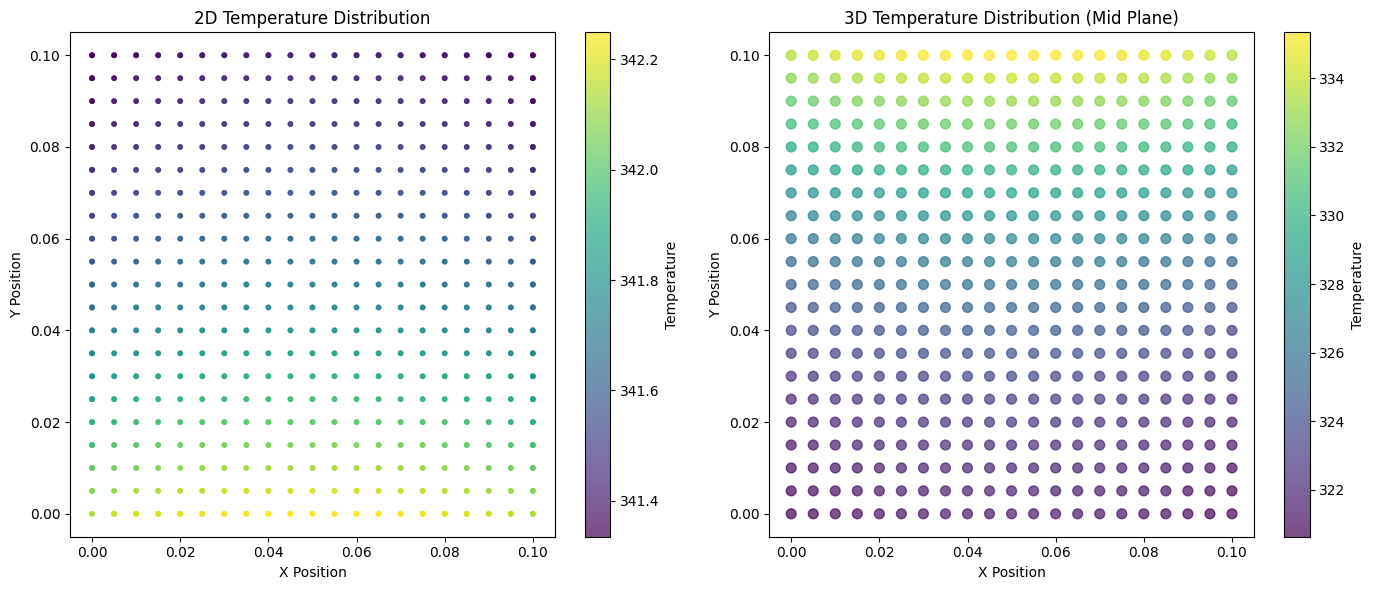

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

sc1 = ax1.scatter(
    df_2d['X'],
    df_2d['Y'],
    c = df_2d['Temperature'],
    cmap = 'viridis',
    alpha = 0.7,
    s = 10,
    vmin = df_2d['Temperature'].min(),
    vmax = df_2d['Temperature'].max()
)
ax1.set_title('2D Temperature Distribution')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')

cbar1 = plt.colorbar(sc1, ax = ax1)
cbar1.set_label('Temperature')

sc2 = ax2.scatter(
    df_3d['X'],
    df_3d['Y'],
    c = df_3d['Temperature'],
    cmap = 'viridis',
    alpha = 0.7,
    s = 50,
    vmin = df_3d['Temperature'].min(),
    vmax = df_3d['Temperature'].max()
)
ax2.set_title('3D Temperature Distribution (Mid Plane)')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')

cbar2 = plt.colorbar(sc2, ax = ax2)
cbar2.set_label('Temperature')

plt.tight_layout()
plt.show()